In [1]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession

In [2]:
animes = pd.read_csv("dataset/animes.csv")

In [3]:
animes.head()

,title,anime_id,url,image_path,airing_status,num_episodes,mpaa_rating,last_scraped_date,title_japanese,synopsis,title_english
0,Hanasaku Iroha,9289,https://myanimelist.net/anime/9289/Hanasaku_Iroha,https://cdn.myanimelist.net/images/anime/3/289...,2,26.0,PG-13 - Teens 13 or older,2020-09-13 11:23:05.509374,花咲くいろは,Ohana Matsumae is an energetic and wild teenag...,Hanasaku Iroha: Blossoms for Tomorrow
1,Uchuu Kyoudai,12431,https://myanimelist.net/anime/12431/Uchuu_Kyoudai,https://cdn.myanimelist.net/images/anime/7/375...,2,99.0,PG-13 - Teens 13 or older,2020-09-13 12:58:18.633841,宇宙兄弟,"On a fateful summer night in 2006, Mutta Nanba...",Space Brothers
2,Yozakura Quartet: Hana no Uta,18497,https://myanimelist.net/anime/18497/Yozakura_Q...,https://cdn.myanimelist.net/images/anime/5/525...,2,13.0,PG-13 - Teens 13 or older,2020-09-13 14:39:45.15066,夜桜四重奏 ～ハナノウタ～,"Hundreds of years ago, the borders between the...",NaN
3,Glass no Kamen Desu ga to Z Specials,34336,https://myanimelist.net/anime/34336/Glass_no_K...,https://cdn.myanimelist.net/images/anime/13/82...,2,2.0,PG-13 - Teens 13 or older,2020-09-14 01:53:48.51646,ガラスの仮面ですが と Z,Two unaired episodes of Glass no Kamen Desu ga...,NaN
4,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,39587,https://myanimelist.net/anime/39587/Re_Zero_ka...,https://cdn.myanimelist.net/images/anime/1444/...,1,13.0,R - 17+ (violence & profanity),2020-09-14 06:45:31.052373,Re:ゼロから始める異世界生活 2nd season,"Even after dying countless times, Subaru final...",Re:ZERO -Starting Life in Another World- Season 2


In [4]:
animes.drop(columns= ["last_scraped_date", "title_japanese", "title_english"], axis= 1, inplace= True)

In [5]:
image_links = animes[["anime_id", "image_path"]].set_index("anime_id")

In [6]:
image_links.head()

,image_path
anime_id,
9289,https://cdn.myanimelist.net/images/anime/3/289...
12431,https://cdn.myanimelist.net/images/anime/7/375...
18497,https://cdn.myanimelist.net/images/anime/5/525...
34336,https://cdn.myanimelist.net/images/anime/13/82...
39587,https://cdn.myanimelist.net/images/anime/1444/...


In [7]:
animes.set_index("anime_id")

,title,url,image_path,airing_status,num_episodes,mpaa_rating,synopsis
anime_id,,,,,,,
9289,Hanasaku Iroha,https://myanimelist.net/anime/9289/Hanasaku_Iroha,https://cdn.myanimelist.net/images/anime/3/289...,2,26.0,PG-13 - Teens 13 or older,Ohana Matsumae is an energetic and wild teenag...
12431,Uchuu Kyoudai,https://myanimelist.net/anime/12431/Uchuu_Kyoudai,https://cdn.myanimelist.net/images/anime/7/375...,2,99.0,PG-13 - Teens 13 or older,"On a fateful summer night in 2006, Mutta Nanba..."
18497,Yozakura Quartet: Hana no Uta,https://myanimelist.net/anime/18497/Yozakura_Q...,https://cdn.myanimelist.net/images/anime/5/525...,2,13.0,PG-13 - Teens 13 or older,"Hundreds of years ago, the borders between the..."
34336,Glass no Kamen Desu ga to Z Specials,https://myanimelist.net/anime/34336/Glass_no_K...,https://cdn.myanimelist.net/images/anime/13/82...,2,2.0,PG-13 - Teens 13 or older,Two unaired episodes of Glass no Kamen Desu ga...
39587,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,https://myanimelist.net/anime/39587/Re_Zero_ka...,https://cdn.myanimelist.net/images/anime/1444/...,1,13.0,R - 17+ (violence & profanity),"Even after dying countless times, Subaru final..."
...,...,...,...,...,...,...,...
39644,Setsugetsuka,https://myanimelist.net/anime/39644/Setsugetsuka,https://cdn.myanimelist.net/images/anime/1001/...,2,1.0,G - All Ages,"A music video of the song ""Setsugetsuka"" perfo..."
40052,Great Pretender,https://myanimelist.net/anime/40052/Great_Pret...,https://cdn.myanimelist.net/images/anime/1418/...,1,23.0,None,A series of unfortunate events has led Makoto ...
41277,Rainbow Ruby,https://myanimelist.net/anime/41277/Rainbow_Ruby,https://cdn.myanimelist.net/images/anime/1050/...,2,26.0,PG - Children,"At Ruby's house, a small event related to the ..."


In [8]:
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17058 entries, 0 to 17057
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          17058 non-null  object 
 1   anime_id       17058 non-null  int64  
 2   url            17058 non-null  object 
 3   image_path     17058 non-null  object 
 4   airing_status  17058 non-null  int64  
 5   num_episodes   16583 non-null  float64
 6   mpaa_rating    17058 non-null  object 
 7   synopsis       16261 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.0+ MB


In [9]:
animes.describe()

,anime_id,airing_status,num_episodes
count,17058.000000,17058.000000,16583.000000
mean,20799.787490,2.000645,11.567931
std,14576.791624,0.198634,47.924225
min,1.000000,1.000000,1.000000
25%,5664.250000,2.000000,1.000000
50%,21772.000000,2.000000,2.000000
75%,35058.750000,2.000000,12.000000
max,42754.000000,3.000000,3057.000000


In [10]:
animes.sort_index(inplace=True)

In [51]:
users = pd.read_csv("dataset/users.csv")

In [52]:
users.head()

,user_id,username,gender,location,birth_date,join_date,last_scraped_date
0,1,Xinil,Male,California,1985-03-04 00:00:00,2004-11-05 00:00:00,2020-09-02 15:20:23.893907
1,3,Aokaado,Male,"Oslo, Norway",1988-11-11 00:00:00,2004-11-11 00:00:00,2020-09-02 15:20:23.893907
2,4,Crystal,Female,"Melbourne, Australia",1989-01-10 00:00:00,2004-11-13 00:00:00,2020-09-02 15:20:23.893907
3,20,vondur,Male,"Bergen, Norway",1988-01-25 00:00:00,2005-01-05 00:00:00,2020-09-02 15:20:23.893907
4,23,Amuro,NaN,Canada,1988-02-22 00:00:00,2005-01-23 00:00:00,2020-09-02 15:20:23.893907


In [53]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302674 entries, 0 to 302673
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            302674 non-null  int64 
 1   username           302674 non-null  object
 2   gender             217800 non-null  object
 3   location           156774 non-null  object
 4   birth_date         168749 non-null  object
 5   join_date          302547 non-null  object
 6   last_scraped_date  302674 non-null  object
dtypes: int64(1), object(6)
memory usage: 16.2+ MB


In [54]:
users.describe()

,user_id
count,3.026740e+05
mean,2.061418e+06
std,2.118055e+06
min,1.000000e+00
25%,2.322448e+05
50%,1.167586e+06
75%,3.883448e+06
max,7.273306e+06


In [50]:
spark = SparkSession.builder.getOrCreate()

In [33]:
# Reading the ratings through csv
ratings = spark.read.format("csv").option("header","true").load("dataset/user_watches.csv")

In [34]:
ratings.show(10)

+--------+-----+------+--------------------+-------+
|anime_id|score|status|num_watched_episodes|user_id|
+--------+-----+------+--------------------+-------+
|      21|    9|     1|                 626|      1|
|   11061|    9|     2|                  30|      1|
|    8676|    0|     1|                   4|      3|
|    9919|    0|     1|                   2|      3|
|    5081|    0|     1|                   8|      3|
|     109|    0|     1|                   1|      3|
|    2986|    6|     1|                  14|      3|
|     269|    9|     1|                 201|      3|
|   31043|    0|     1|                   3|      3|
|   28223|    0|     1|                   7|      3|
+--------+-----+------+--------------------+-------+
only showing top 10 rows



In [35]:
ratings.count()

68235827

In [36]:
# Looks like all the values are stored as strings which need to be converted into numeric format
ratings.printSchema()

root
 |-- anime_id: string (nullable = true)
 |-- score: string (nullable = true)
 |-- status: string (nullable = true)
 |-- num_watched_episodes: string (nullable = true)
 |-- user_id: string (nullable = true)



In [40]:
pd.DataFrame(ratings.dtypes, columns=["Columns", "Type"]).set_index("Columns")

,Type
Columns,
anime_id,string
score,string
status,string
num_watched_episodes,string
user_id,string


In [44]:
# Convert the columns to the desired formats

#Import the datatypes from sql.types
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

ratings_converted = ratings.withColumn("anime_id",col("anime_id").cast(IntegerType())) \
                            .withColumn("score", col("score").cast(IntegerType())) \
                            .withColumn("status", col("status").cast(IntegerType())) \
                            .withColumn("num_watched_episodes", col("num_watched_episodes").cast(IntegerType())) \
                            .withColumn("user_id", col("user_id").cast(IntegerType()))



In [45]:
pd.DataFrame(ratings_converted.dtypes, columns=["Columns", "Type"]).set_index("Columns")

,Type
Columns,
anime_id,int
score,int
status,int
num_watched_episodes,int
user_id,int


In [46]:
ratings_converted.describe().show()

+-------+------------------+------------------+------------------+--------------------+------------------+
|summary|          anime_id|             score|            status|num_watched_episodes|           user_id|
+-------+------------------+------------------+------------------+--------------------+------------------+
|  count|          68235827|          68235827|          68235827|            68235827|          68235827|
|   mean|13378.034951858941| 4.418941225699514|2.9792683834549263|    14.5287745981301|2199570.0187202976|
| stddev|12595.299422842292|3.9361641781290206|1.7208643699307469|   359.8135277987043|2077056.6802860275|
|    min|                 1|                 0|                 0|                   0|                 1|
|    max|             42754|                10|                55|               65535|           7273306|
+-------+------------------+------------------+------------------+--------------------+------------------+



In [56]:
ratings_converted.select("score").distinct().rdd.map(lambda r: r[0]).collect()

[1, 6, 3, 5, 9, 4, 8, 7, 10, 2, 0]

In [60]:
numeric_cols = ["anime_id", "score", "status", "num_watched_episodes", "user_id"]
missing_counts = {}
for index, column in enumerate(numeric_cols):
    
    count = ratings_converted.where(col(column).isin([0,None,np.nan])).count()
    missing_counts.update({column:count})

In [61]:
missing_counts

{'anime_id': 0,
 'score': 28166294,
 'status': 169,
 'num_watched_episodes': 17820511,
 'user_id': 0}

22/02/05 13:01:38 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1006245 ms exceeds timeout 120000 ms
22/02/05 13:01:38 WARN SparkContext: Killing executors is not supported by current scheduler.


In [75]:
rate = pd.read_csv("dataset/user_watches.csv")

In [64]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68235827 entries, 0 to 68235826
Data columns (total 5 columns):
 #   Column                Dtype
---  ------                -----
 0   anime_id              int64
 1   score                 int64
 2   status                int64
 3   num_watched_episodes  int64
 4   user_id               int64
dtypes: int64(5)
memory usage: 2.5 GB


In [65]:
rate.describe()

,anime_id,score,status,num_watched_episodes,user_id
count,6.823583e+07,6.823583e+07,6.823583e+07,6.823583e+07,6.823583e+07
mean,1.337803e+04,4.418941e+00,2.979268e+00,1.452877e+01,2.199570e+06
std,1.259530e+04,3.936164e+00,1.720864e+00,3.598135e+02,2.077057e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.954000e+03,0.000000e+00,2.000000e+00,0.000000e+00,2.888850e+05
50%,9.513000e+03,6.000000e+00,2.000000e+00,4.000000e+00,1.407861e+06
75%,2.325100e+04,8.000000e+00,4.000000e+00,1.300000e+01,4.044265e+06
max,4.275400e+04,1.000000e+01,5.500000e+01,6.553500e+04,7.273306e+06


In [66]:
import seaborn as sns

<AxesSubplot:xlabel='user_id', ylabel='anime_id'>

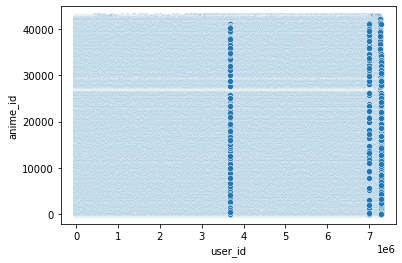

In [81]:
sns.scatterplot(data=rate,x="user_id", y = "anime_id")